In [125]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

In [126]:
class Submodel:
    def __init__(self, id : gum.InfluenceDiagram, decisionNodes : set):
        self.decisionNodes : set = decisionNodes
        self.superId : gum.InfluenceDiagram = id
        self.RELuInit()
        self.nodes = set().union(decisionNodes, self.RELu)
        self.RELoInit()
        self.RELhInit()
    
    def RELoInit(self) -> set:
        self.RELo = {4, 5} # INTERFACE NODES INTERFACE HERE INTERFACE INTERFACE interface??? wait are they actually
        self.nodes = self.nodes.union(self.RELo) 
        return

    def RELhInit(self) -> set:
        self.RELh = set()
        self.nodes = self.nodes.union(self.RELh)
        return
    
    def RELuInit(self) -> set:
        ''' 
        gets set of relevant utility nodes to the submobel (de(D) \cap U)
        '''
        self.RELu = set().union(*({i for i in self.superId.descendants(d) if self.superId.isUtilityNode(i)} for d in self.decisionNodes))
        return self.RELu
    
    def toInfluenceDiagram(self) -> gum.InfluenceDiagram:
        ''' 
        makes submodel into standalone ID (no RELo)
        '''
        res = gum.InfluenceDiagram()
        added = {}
        for node in self.nodes:
            if self.superId.isChanceNode(node):
                added[node] = res.addChanceNode(self.superId.variable(node))
            elif self.superId.isDecisionNode(node):
                added[node] = res.addDecisionNode(self.superId.variable(node))
            elif self.superId.isUtilityNode(node):
                added[node] = res.addUtilityNode(self.superId.variable(node))
        arcs = self.superId.arcs()
        for a, b in arcs:
            if a in added.keys() and b in added.keys():
                res.addArc(added[a], added[b])
        return res


In [ ]:
class SubmodelTree:
    id = 1
    def __init__(self, submodel : Submodel):
        self.id = SubmodelTree.id
        SubmodelTree.id += 1
        self.submodel = submodel
        self.parent = None # i am root
        self.children = [] 
        self.message = []  # messages received, potentials of inference is child submodels
        self.isLeaf = False # False at root unless submodel building results in one big submodel
        self.computedChildren = 0

    def __str__(self):
        return f'node {self.id}'
    
    def getLeaves(self, res):
        if self.isLeaf:
            res.add(self)
        else:
            for c in self.children:
                c.getLeaves(res)

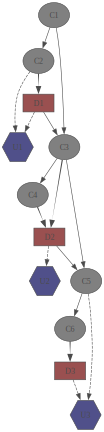

[(0, 'Chance'), (1, 'Chance'), (2, 'Chance'), (3, 'Chance'), (4, 'Chance'), (5, 'Chance'), (6, 'Decision'), (7, 'Decision'), (8, 'Decision'), (9, 'Utility'), (10, 'Utility'), (11, 'Utility')]


In [127]:
figure2 = gum.loadID('figure_2.bifxml')
gnb.showInfluenceDiagram(figure2)
print([(n, 'Chance' if figure2.isChanceNode(n) else ('Decision' if figure2.isDecisionNode(n) else 'Utility')) for n in figure2.nodes()])

In [128]:
ewe = Submodel(figure2, {8})

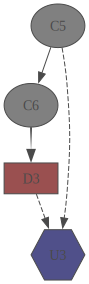

In [130]:
id = ewe.toInfluenceDiagram()
gnb.showInfluenceDiagram(id)